<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149427778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=bfc094d54f46866cec20797f3175367ad569124ad50792864e12fff93dd48800
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.159123,1.818943,0.119266,1.897159,14.116446,12.508005,14.600489,17.559034,2.298456,0.637020,...,0.139147,4.185131,3.876547,3.966074,3.762880,0.430117,6.332517,0.455737,0.937316,0.000663
2014-11-25,12.044274,1.819092,0.119666,1.901584,14.118616,12.536687,14.638259,17.611218,2.300944,0.638980,...,0.138826,4.219929,3.877143,3.979317,3.763559,0.430446,6.363177,0.456440,0.940802,0.000661
2014-11-26,12.045147,1.818022,0.119895,1.907480,14.106437,12.535026,14.672645,17.641778,2.297993,0.640031,...,0.138706,4.223105,3.874862,3.999897,3.759411,0.430862,6.384158,0.456593,0.942125,0.000660
2014-11-27,12.057459,1.823927,0.119974,1.903085,14.143677,12.473238,14.664537,17.627140,2.303418,0.638720,...,0.139073,4.218970,3.885092,3.987279,3.769335,0.431604,6.411458,0.457798,0.944612,0.000662
2014-11-28,12.071798,1.828934,0.119480,1.908166,14.198605,12.428579,14.706606,17.675403,2.311027,0.640488,...,0.139819,4.241555,3.899966,3.997355,3.783470,0.432489,6.396344,0.458315,0.948534,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,13.841431,2.786765,0.144116,1.957706,21.831496,15.742543,24.039145,23.087372,2.982847,0.941125,...,0.077609,5.194265,5.997664,4.650045,5.822509,0.604918,0.771829,0.673666,0.596978,0.000896
2023-11-01,13.963441,2.786706,0.144543,1.954037,21.801539,15.751715,24.058630,23.074436,2.982307,0.935547,...,0.077379,5.162571,5.989434,4.639119,5.811574,0.603252,0.770141,0.672742,0.596159,0.000895
2023-11-02,13.976347,2.776042,0.144387,1.954017,21.719394,15.801605,24.010710,23.069321,2.969415,0.944167,...,0.076752,5.190439,5.966866,4.645462,5.792765,0.604660,0.766836,0.670207,0.593913,0.000892


# Сборка датасета

In [5]:
forecast_length = 10


# Get time series from dataframe
target_name = abscur_data.columns[4]
target_train = np.ravel(abscur_data[target_name].values[:-forecast_length])
target_test = np.ravel(abscur_data[target_name].values[-forecast_length:])

idx_train = abscur_data.index[:-forecast_length]
idx_test = abscur_data.index[-forecast_length:]

In [6]:
historical_data_inp = {}

for inp_name in abscur_data.columns[:]:
    if inp_name == target_name:
        history = np.ravel(abscur_data[inp_name].values)

        historical_data_inp[inp_name] = history[:-forecast_length]
    

In [7]:
historical_data_inp

{'USD': array([14.11644615, 14.11861646, 14.1064365 , ..., 21.81742743,
        21.84539535, 21.88512473])}

# Сборка модели

In [8]:
fedot = Fedot(problem='ts_forecasting',
              task_params=TsForecastingParams(forecast_length=forecast_length),
              timeout=10)

# Обучение модели

In [9]:
fedot.fit(features=historical_data_inp,
                     target=historical_data_inp[target_name])

2023-11-05 15:13:29,016 - Unknown integration target: 
2023-11-05 15:13:36,706 - Unknown integration target: 
2023-11-05 15:13:44,759 - Unknown integration target: 
2023-11-05 15:13:52,331 - Unknown integration target: 
2023-11-05 15:13:59,998 - Unknown integration target: 
2023-11-05 15:14:17,155 - Unknown integration target: 
2023-11-05 15:14:34,426 - Unknown integration target: 
2023-11-05 15:14:51,659 - Unknown integration target: 
2023-11-05 15:14:53,803 - Unknown integration target: 
2023-11-05 15:14:53,807 - Unknown integration target: 
2023-11-05 15:15:06,732 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 264.2 MiB
2023-11-05 15:15:06,738 - ApiComposer - Initial pipeline was fitted in 10.6 sec.
2023-11-05 15:15:06,744 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-05 15:15:06,797 - ApiComposer - AutoML configured. Parameters tuning: True. Time

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-05 15:20:58,723 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [05:51<?, ?gen/s]

2023-11-05 15:20:58,750 - ApiComposer - Hyperparameters tuning started with 4 min. timeout


2023-11-05 15:21:09,767 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}
ridge - {'alpha': 8.443376292401947}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/USD - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.039
  0%|          | 15/100000 [01:59<664:12:23, 23.92s/trial, best loss: 0.0388140247575614]
2023-11-05 15:25:25,327 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}
ridge - {'alpha': 8.443376292401947}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/USD - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-11-05 15:25:25,330 - PipelineTuner - Final metric: 0.039
2023-11-05 15:25:25,333 - ApiComposer - Hyperparameters tuning finished
2023-11-05 15:25:25

{'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}

# Вид сети

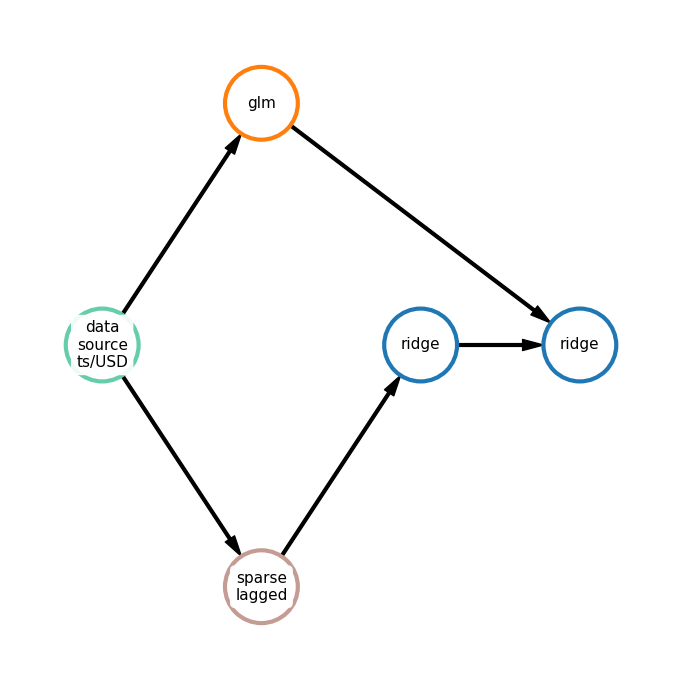

In [10]:
fedot.current_pipeline.show()

In [11]:
fedot.current_pipeline.print_structure()

Pipeline structure:
{'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}
ridge - {'alpha': 8.443376292401947}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/USD - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}


# Предсказание

In [12]:
forecast = fedot.predict(historical_data_inp,in_sample=False)
forecast

array([21.88367346, 21.88336351, 21.88278422, 21.88233539, 21.88159356,
       21.88056276, 21.87957688, 21.87901604, 21.87869177, 21.8784933 ])

# Расчет метрик

In [13]:
fedot.get_metrics(target_test,metric_names=['mae','mape'])

{'mae': 0.092, 'mape': 0.004}

# График

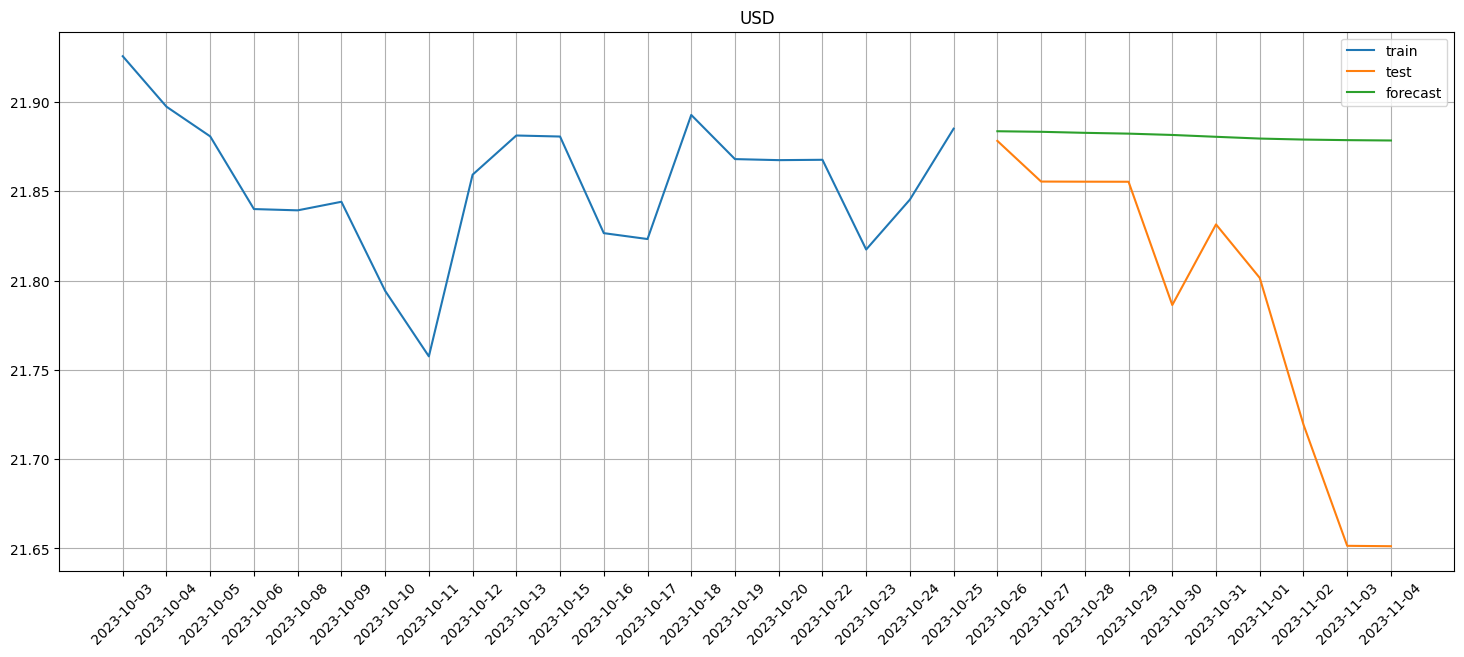

In [14]:
plt.plot(idx_train[-20:],target_train[-20:],label='train')
plt.plot(idx_test,target_test,label='test')
plt.plot(idx_test,forecast,label='forecast')
plt.grid()
plt.legend()
plt.title(target_name)
plt.xticks(rotation=45)
plt.show()